<font size="+5">#08. Hyperparameter Tuning with Cross Validation</font>

- Book + Private Lessons [Here ↗](https://sotastica.com/reservar)
- Subscribe to my [Blog ↗](https://blog.pythonassembly.com/)
- Let's keep in touch on [LinkedIn ↗](www.linkedin.com/in/jsulopz) 😄

# Load the Data

> - We take some dataset from the _[Machine Learning Data Repository UCI](https://archive.ics.uci.edu/ml/datasets/adult)_
> - The aim is to predict weather a **person** (rows) `earned>50k` a year or not
> - Based on their **social-demographic features** (columns)

Esta tabla resume la información de personas que ganan más de 50,000 al año o menos. Por tanto, nuestro objetivo es desarrollar un modelo que calcule mejor si una persona gana por encima o por debajo de dicho umbral. La columna a predecir es la última.
>
> PD: You may see the column names & meanings [here ↗](https://archive.ics.uci.edu/ml/datasets/adult).

In [2]:
import pandas as pd
pd.set_option("display.max_columns", None)

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
df = pd.read_csv(url, header=None, na_values=' ?')
df.rename(columns={14: 'target'}, inplace=True)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Feature Selection

> 1. Class/Labels/Dependent/`Target` `y`
> 2. Independents/Features/Characteristics/`Explanatory` `X`

In [3]:
df.isna().sum()

0            0
1         1836
2            0
3            0
4            0
5            0
6         1843
7            0
8            0
9            0
10           0
11           0
12           0
13         583
target       0
dtype: int64

In [4]:
df = df.dropna(axis=0)

In [5]:
df.isna().sum()

0         0
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         0
10        0
11        0
12        0
13        0
target    0
dtype: int64

In [6]:
df = pd.get_dummies(df, drop_first=True)

In [7]:
df

,0,2,4,10,11,12,1_ Local-gov,1_ Private,1_ Self-emp-inc,1_ Self-emp-not-inc,1_ State-gov,1_ Without-pay,3_ 11th,3_ 12th,3_ 1st-4th,3_ 5th-6th,3_ 7th-8th,3_ 9th,3_ Assoc-acdm,3_ Assoc-voc,3_ Bachelors,3_ Doctorate,3_ HS-grad,3_ Masters,3_ Preschool,3_ Prof-school,3_ Some-college,5_ Married-AF-spouse,5_ Married-civ-spouse,5_ Married-spouse-absent,5_ Never-married,5_ Separated,5_ Widowed,6_ Armed-Forces,6_ Craft-repair,6_ Exec-managerial,6_ Farming-fishing,6_ Handlers-cleaners,6_ Machine-op-inspct,6_ Other-service,6_ Priv-house-serv,6_ Prof-specialty,6_ Protective-serv,6_ Sales,6_ Tech-support,6_ Transport-moving,7_ Not-in-family,7_ Other-relative,7_ Own-child,7_ Unmarried,7_ Wife,8_ Asian-Pac-Islander,8_ Black,8_ Other,8_ White,9_ Male,13_ Canada,13_ China,13_ Columbia,13_ Cuba,13_ Dominican-Republic,13_ Ecuador,13_ El-Salvador,13_ England,13_ France,13_ Germany,13_ Greece,13_ Guatemala,13_ Haiti,13_ Holand-Netherlands,13_ Honduras,13_ Hong,13_ Hungary,13_ India,13_ Iran,13_ Ireland,13_ Italy,13_ Jamaica,13_ Japan,13_ Laos,13_ Mexico,13_ Nicaragua,13_ Outlying-US(Guam-USVI-etc),13_ Peru,13_ Philippines,13_ Poland,13_ Portugal,13_ Puerto-Rico,13_ Scotland,13_ South,13_ Taiwan,13_ Thailand,13_ Trinadad&Tobago,13_ United-States,13_ Vietnam,13_ Yugoslavia,target_ >50K
0,39,77516,13,2174,0,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,50,83311,13,0,0,13,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,38,215646,9,0,0,40,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,53,234721,7,0,0,40,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,28,338409,13,0,0,40,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,12,0,0,38,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
32557,40,154374,9,0,0,40,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
32558,58,151910,9,0,0,40,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
32559,22,201490,9,0,0,20,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [8]:
X = df.drop(columns='target_ >50K')

In [9]:
y = df[['target_ >50K']]

# Data Preprocessing

``
Primero se definen X e y y luego se hace el resto (NAs y dummies) o al revés???
``

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# `DecisionTreeClassifier()` with Default Hyperparameters

In [13]:
from sklearn.tree import DecisionTreeClassifier

In [14]:
dt = DecisionTreeClassifier()

In [63]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [64]:
dt.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

## Accuracy

> - `model.score()`
>
> In `train` data

In [65]:
dt.score(X_train, y_train)

1.0

> In `test` data

In [66]:
dt.score(X_test, y_test)

0.8095922201348216

## Model Visualization

> - We'll use `plot_tree()`, located within `tree` module from `sklearn` library
> - You may use `shift + tab` to ask `Python` how the function `plot_tree()` works

In [20]:
from sklearn import tree
from sklearn.tree import plot_tree

In [93]:
plot_tree(decision_tree=dt, feature_names=X.columns, filled=True);

Error in callback <function flush_figures at 0x000002D75F20C4C0> (for post_execute):


KeyboardInterrupt: 

## Interpretation

> - Why the difference on accuracy is so much?

# `DecisionTreeClassifier()` with Custom Hyperparameters

> - The `model` has this hyperparameters ↓

In [72]:
model = DecisionTreeClassifier()

In [70]:
model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

## 1st Configuration

In [88]:
model = DecisionTreeClassifier(max_depth=3)

In [89]:
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

### Accuracy

> In `train` data

In [90]:
model.score(X_train, y_train)

0.8400985175010657

> In `test` data

In [91]:
model.score(X_test, y_test)

0.8406453751795778

### Model Visualization

> - `plot_tree()`

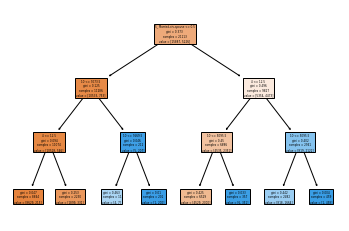

In [92]:
plot_tree(decision_tree=model, feature_names=X.columns, filled=True);

## 2nd Configuration

In [101]:
model = DecisionTreeClassifier(max_depth=3, min_samples_leaf=2)

In [102]:
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=2)

### Accuracy

> In `train` data

In [103]:
model.score(X_train, y_train)

0.8400985175010657

> In `test` data

In [104]:
model.score(X_test, y_test)

0.8406453751795778

### Model Visualization

> - `plot_tree()`

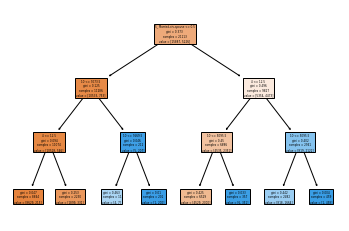

In [105]:
plot_tree(decision_tree=model, feature_names=X.columns, filled=True);

## 3rd Configuration

In [123]:
model = DecisionTreeClassifier(splitter='random', max_depth=3, min_samples_leaf=10)

In [124]:
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=10, splitter='random')

### Accuracy

> In `train` data

In [125]:
model.score(X_train, y_train)

0.8187372708757638

> In `test` data

In [126]:
model.score(X_test, y_test)

0.8215272405790696

### Model Visualization

> - `plot_tree()`

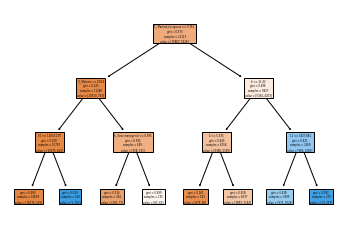

In [127]:
plot_tree(decision_tree=model, feature_names=X.columns, filled=True);

## 4th Configuration

In [128]:
model = DecisionTreeClassifier(splitter='random', max_depth=3, min_samples_leaf=4, min_samples_split=6)

In [129]:
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=4, min_samples_split=6,
                       splitter='random')

### Accuracy

> In `train` data

In [130]:
model.score(X_train, y_train)

0.8167006109979633

> In `test` data

In [131]:
model.score(X_test, y_test)

0.8186539949165653

### Model Visualization

> - `plot_tree()`

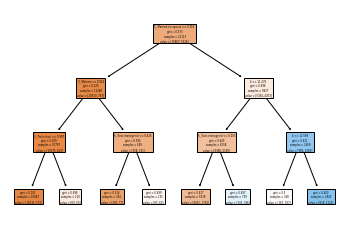

In [132]:
plot_tree(decision_tree=model, feature_names=X.columns, filled=True);

## 5th Configuration

In [15]:
model = DecisionTreeClassifier(max_depth=4, min_samples_leaf=200, ccp_alpha=10, max_features=15)

In [16]:
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=10, max_depth=4, max_features=15,
                       min_samples_leaf=200)

### Accuracy

> In `train` data

In [17]:
model.score(X_train, y_train)

0.7524747785724435

> In `test` data

In [18]:
model.score(X_test, y_test)

0.7478174383909825

### Model Visualization

> - `plot_tree()`

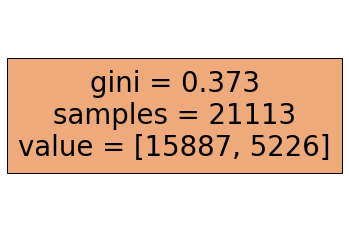

In [21]:
plot_tree(decision_tree=model, feature_names=X.columns, filled=True);

# `GridSearchCV()` to find Best Hyperparameters

> - How many scores for each fold?

<img src="src/grid_search_cross_validation.png" style="margin-top: 100px"/>

In [30]:
from sklearn.model_selection import GridSearchCV

In [23]:
GridSearchCV(estimator=dt, param_grid={})

GridSearchCV(estimator=DecisionTreeClassifier(), param_grid={})

In [29]:
GridSearchCV.fit(??)

AttributeError: 'DataFrame' object has no attribute 'estimator'

# Other Models

## Support Vector Machines `SVC()`

> - https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html

In [3]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/efR1C6CvhmE" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

## `KNeighborsClassifier()`

In [3]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/HVXime0nQeI" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

# Best Model with Best Hyperparameters

# Achieved Goals

_Double click on **this cell** and place an `X` inside the square brackets (i.e., [X]) if you think you understand the goal:_

- [ ] Even a model can be bettered
- [ ] The goal is to make models that perform a better accuracy on data not seen
    - The banks would like to know if a **future client** will be able to pay the loan
    - Not a past client
    - Unfortunately, we do not have data for future clients
    - So, we fix this with `Data Splitting` into
        - Train
            - Fold Validation
        - Test
- [ ] Understand the Machine Learning Applications to businesses
    - To predict if a customer will pay the loan
    - To predict if an athlete will have an injury